In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
ad=pd.read_csv('/content/train_exit.csv')
ad.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [17]:
ad.shape

(13994, 30)

In [3]:
ad.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [5]:
ad.tail()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1
13993,PLID_236,Darius Schuman,16,F,Chile,5'8,159lbs,53.0,59.0,67.0,...,Right,4.2,0.0,6.7,0.0,Medium,Source,1.0,0.0,0


In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [6]:
ad.dtypes


player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

In [7]:
ad.isnull().sum()

player_id                       0
name                            0
age                             0
gender                         19
country                         0
height                          0
weight                        417
ball_controlling_skills       413
body_reflexes                   0
body_balance                    0
jumping_skills                 24
penalties_conversion_rate      30
mental_strength                28
goalkeeping_skills              0
defending_skills                0
passing_skills                  0
dribbling_skills                0
shot_accuracy                 572
body_strength_stamina           0
max_running_speed               0
strong_foot                  1833
behaviour_rating              703
matches_played                666
fitness_rating                695
trophies_won                    0
dedication_level                0
coaching                      125
years_of_experience           144
no_of_disqualifications         0
selection     

**univariate analysis**

In [9]:
ad['ball_controlling_skills'].describe()

count    13581.000000
mean        56.043958
std         16.787353
min          5.000000
25%         51.000000
50%         61.000000
75%         67.000000
max         95.000000
Name: ball_controlling_skills, dtype: float64

### univariate analysis

In [10]:
ad['ball_controlling_skills'].value_counts()

ball_controlling_skills
62.0    576
64.0    575
65.0    551
60.0    540
63.0    536
       ... 
91.0      1
94.0      1
95.0      1
5.0       1
6.0       1
Name: count, Length: 89, dtype: int64

In [11]:
ad['body_reflexes'].describe()


count    13994.000000
mean        61.934329
std         14.931963
min         12.000000
25%         54.000000
50%         64.000000
75%         72.000000
max         96.000000
Name: body_reflexes, dtype: float64

In [12]:
ad['body_balance'].describe()

count    13994.000000
mean        62.753323
std         14.203638
min          9.000000
25%         55.000000
50%         65.000000
75%         73.000000
max         97.000000
Name: body_balance, dtype: float64

In [13]:
ad['jumping_skills'].describe()

count    13970.000000
mean        63.612026
std         11.938712
min         14.000000
25%         57.000000
50%         64.000000
75%         72.000000
max         95.000000
Name: jumping_skills, dtype: float64

In [39]:
ad['jumping_skills'].value_counts()

jumping_skills
71.0    515
61.0    509
64.0    490
65.0    481
69.0    480
       ... 
25.0      4
22.0      2
24.0      1
95.0      1
14.0      1
Name: count, Length: 74, dtype: int64

In [14]:
ad['penalties_conversion_rate'].describe()

count    13964.000000
mean        48.495703
std         15.767506
min          7.000000
25%         39.000000
50%         49.000000
75%         60.000000
max         92.000000
Name: penalties_conversion_rate, dtype: float64

In [40]:
ad['penalties_conversion_rate'].value_counts()

penalties_conversion_rate
55.0    393
59.0    385
45.0    369
49.0    367
48.0    361
       ... 
88.0      3
89.0      3
91.0      1
92.0      1
7.0       1
Name: count, Length: 86, dtype: int64

In [15]:
ad['mental_strength'].describe()

count    13966.000000
mean        56.768366
std         11.977744
min          9.000000
25%         49.000000
50%         58.000000
75%         65.000000
max         92.000000
Name: mental_strength, dtype: float64

In [41]:
ad['mental_strength'].value_counts()

mental_strength
56.0    519
60.0    512
55.0    487
58.0    486
59.0    478
       ... 
13.0      1
92.0      1
9.0       1
16.0      1
89.0      1
Name: count, Length: 83, dtype: int64

In [44]:
ad['shot_accuracy'].describe()

count    13422.000000
mean        47.178140
std         15.803991
min          7.000000
25%         38.000000
50%         50.000000
75%         59.000000
max         86.000000
Name: shot_accuracy, dtype: float64

In [43]:
ad['shot_accuracy'].value_counts()

shot_accuracy
53.0    408
54.0    404
50.0    396
55.0    388
51.0    387
       ... 
8.0       3
82.0      2
83.0      1
86.0      1
7.0       1
Name: count, Length: 79, dtype: int64

In [45]:
ad['strong_foot'].describe()

count     12161
unique        3
top       Right
freq       8359
Name: strong_foot, dtype: object

In [46]:
ad['strong_foot'].value_counts()

strong_foot
Right    8359
Left     2531
Any      1271
Name: count, dtype: int64

In [47]:
ad['behaviour_rating'].describe()

count    13291.000000
mean         5.822068
std          1.095702
min          2.100000
25%          5.100000
50%          5.900000
75%          6.500000
max          9.800000
Name: behaviour_rating, dtype: float64

In [48]:
ad['behaviour_rating'].value_counts()

behaviour_rating
5.9    605
6.3    600
5.7    597
6.2    590
6.0    585
      ... 
2.2      2
9.3      2
9.5      1
9.8      1
9.6      1
Name: count, Length: 64, dtype: int64

complete the univariate analysis

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

### Bivariate analysys

**Bivariate analysys**

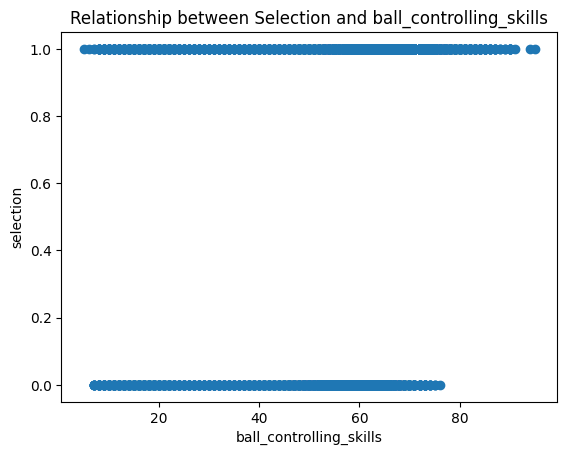

In [69]:
# bivariate analysis-Plot the selection against each column and check
plt.scatter(ad['ball_controlling_skills'],ad['selection'])
plt.title("Relationship between Selection and ball_controlling_skills")
plt.xlabel("ball_controlling_skills")
plt.ylabel("selection")
plt.show()

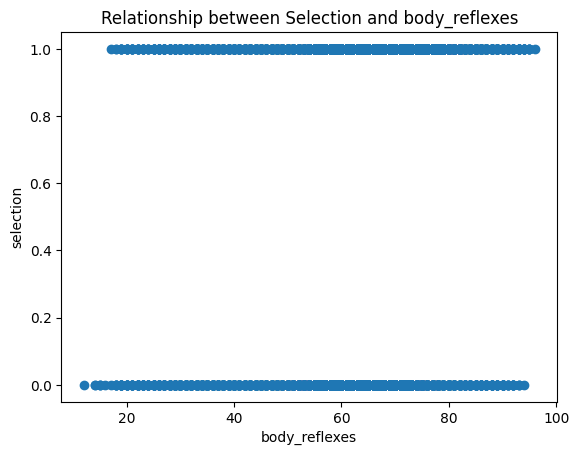

In [22]:
plt.scatter(ad['body_reflexes'],ad['selection'])
plt.title("Relationship between Selection and body_reflexes")
plt.xlabel("body_reflexes")
plt.ylabel("selection")
plt.show()

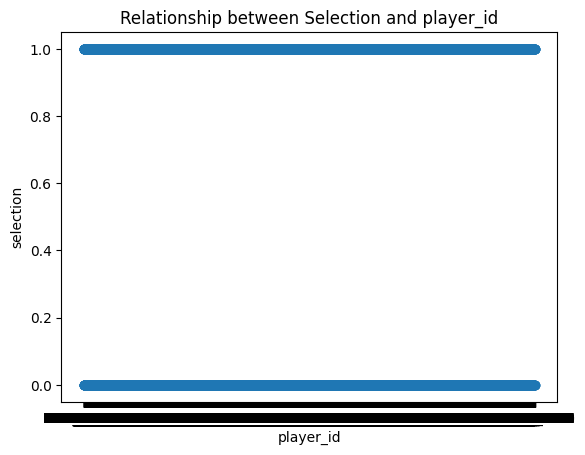

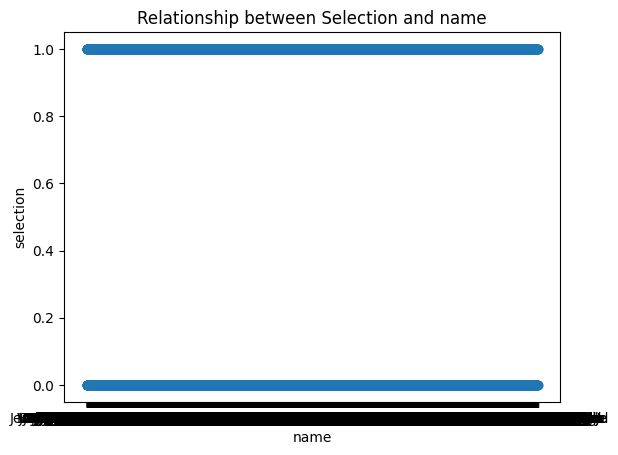

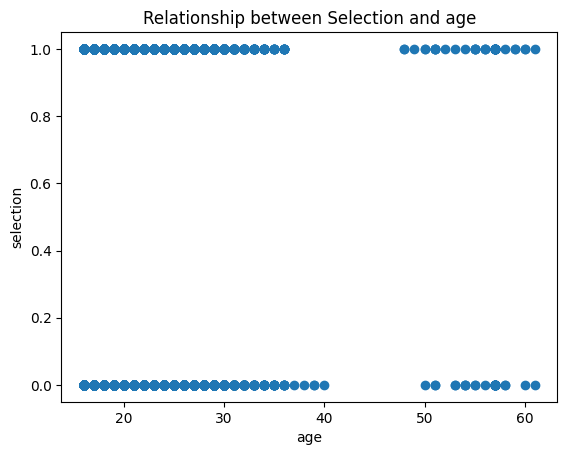

TypeError: 'value' must be an instance of str or bytes, not a float

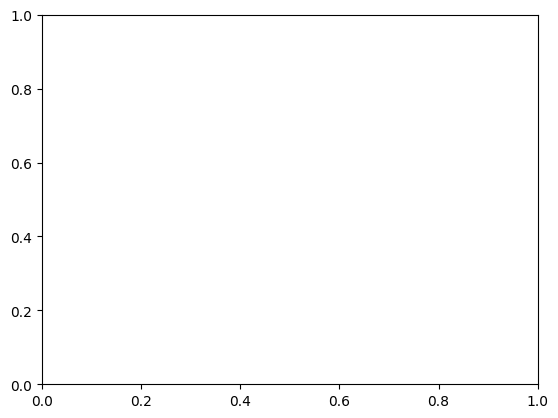

In [26]:
ad1=ad.dropaxis=1)

for i in ad1:
  plt.scatter(ad1[i],ad1['selection'])
  plt.title("Relationship between Selection and "+i)
  plt.xlabel(i)
  plt.ylabel("selection")
  plt.show()


## multivariate analysys

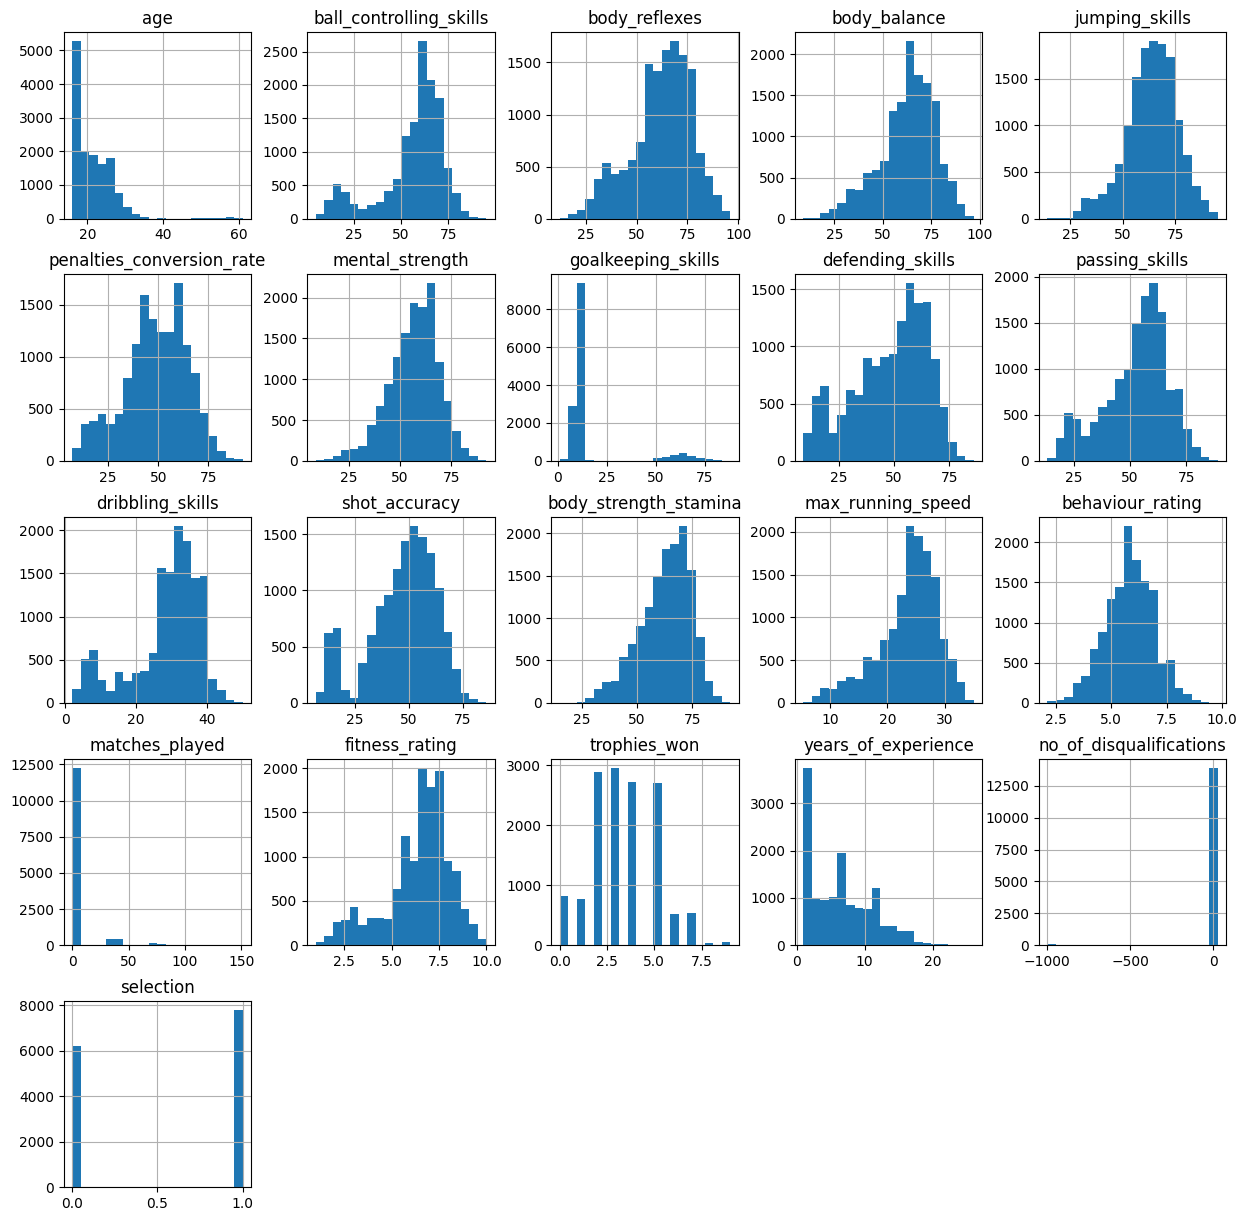

In [30]:
ad.hist(bins=20, figsize=(15, 15))
plt.show()

## feature selection


In [80]:
# Correlation matrix
ad2=ad[['body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed',  'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won'  , 'years_of_experience', 'no_of_disqualifications','selection'
       ]]
corr = ad2.corr()
corr



,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
body_balance,1.000000,0.201172,0.486471,0.337687,-0.520488,0.289356,0.584480,0.664494,0.541877,0.129391,0.687482,0.159227,0.041408,0.482731,0.197795,-0.074671,-0.012731,0.100898
jumping_skills,0.201172,1.000000,0.135705,0.264315,-0.204789,0.326436,0.157543,0.151524,0.186959,0.404124,0.245175,0.267306,0.112615,0.363427,0.056760,0.156122,-0.010994,0.085277
penalties_conversion_rate,0.486471,0.135705,1.000000,0.568721,-0.631879,0.305723,0.691159,0.773353,0.873006,0.391848,0.542965,0.353688,0.212820,0.518531,0.248151,0.142095,-0.012323,0.177305
mental_strength,0.337687,0.264315,0.568721,1.000000,-0.423501,0.521529,0.712112,0.621144,0.684802,0.528807,0.384256,0.665164,0.363217,0.544183,0.227516,0.368217,-0.002148,0.319026
goalkeeping_skills,-0.520488,-0.204789,-0.631879,-0.423501,1.000000,-0.660254,-0.661463,-0.760564,-0.717514,-0.546024,-0.625644,-0.078789,-0.004823,-0.704367,-0.176665,0.098214,0.013678,-0.047467
defending_skills,0.289356,0.326436,0.305723,0.521529,-0.660254,1.000000,0.636592,0.491838,0.464936,0.680394,0.335472,0.390215,0.157260,0.699844,0.100340,0.178304,0.001202,0.153933
passing_skills,0.584480,0.157543,0.691159,0.712112,-0.661463,0.636592,1.000000,0.870070,0.849184,0.501256,0.595467,0.512608,0.254732,0.685628,0.265326,0.178630,-0.008077,0.257658
dribbling_skills,0.664494,0.151524,0.773353,0.621144,-0.760564,0.491838,0.870070,1.000000,0.889571,0.455729,0.754712,0.380460,0.174057,0.683558,0.269023,0.015866,-0.014149,0.235985
shot_accuracy,0.541877,0.186959,0.873006,0.684802,-0.717514,0.464936,0.849184,0.889571,1.000000,0.515122,0.621555,0.452907,0.234293,0.652681,0.278046,0.171729,-0.015928,0.217667
body_strength_stamina,0.129391,0.404124,0.391848,0.528807,-0.546024,0.680394,0.501256,0.455729,0.515122,1.000000,0.381384,0.428632,0.141747,0.836637,0.118650,0.227429,-0.011216,0.133262


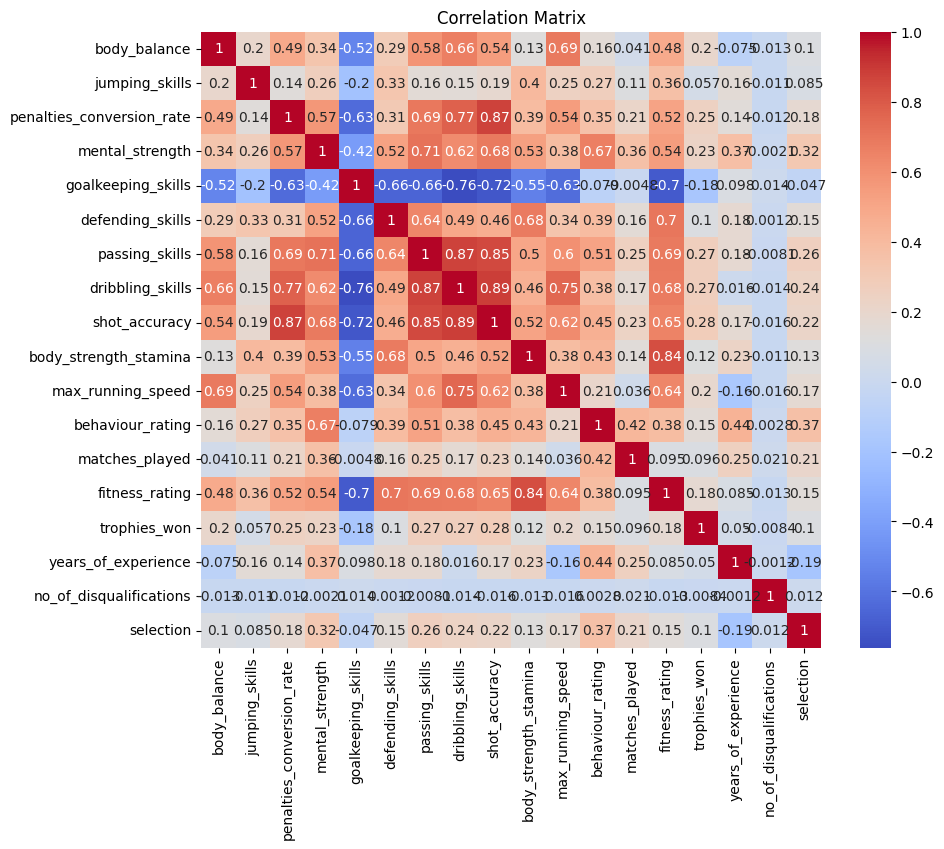

In [81]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
plt.show()

## null value removal

In [82]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
ad[['ball_controlling_skills','jumping_skills', 'penalties_conversion_rate', 'mental_strength']]= imputer.fit_transform(ad[['ball_controlling_skills','jumping_skills', 'penalties_conversion_rate', 'mental_strength']])

ad.isna().sum()

player_id                       0
name                            0
age                             0
gender                         19
country                         0
height                          0
weight                        417
ball_controlling_skills         0
body_reflexes                   0
body_balance                    0
jumping_skills                  0
penalties_conversion_rate       0
mental_strength                 0
goalkeeping_skills              0
defending_skills                0
passing_skills                  0
dribbling_skills                0
shot_accuracy                 572
body_strength_stamina           0
max_running_speed               0
strong_foot                  1833
behaviour_rating              703
matches_played                666
fitness_rating                695
trophies_won                    0
dedication_level                0
coaching                      125
years_of_experience           144
no_of_disqualifications         0
selection     

In [91]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
ad[['shot_accuracy','behaviour_rating','years_of_experience','fitness_rating','matches_played']]= imputer.fit_transform(ad[['shot_accuracy','behaviour_rating','years_of_experience','fitness_rating','matches_played']])


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '176lbs'

In [86]:
ad['gender'].fillna(ad['gender'].mode()[0], inplace=True)

In [92]:
ad=ad.drop('weight',axis=1)

In [94]:
ad['strong_foot'].fillna(ad['strong_foot'].mode()[0], inplace=True)

In [128]:
ad.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [129]:

ad['coaching'].fillna(ad['coaching'].mode()[0], inplace=True)

ad.isna().sum()


player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

### Outlier handling

<ipython-input-99-6074864c22ad>:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


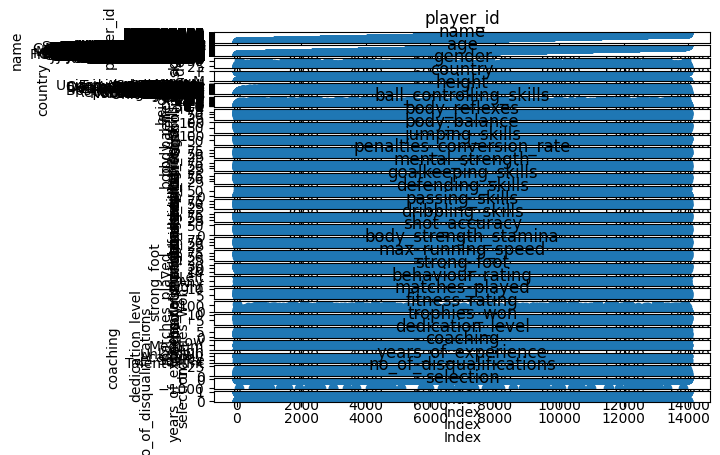

In [99]:
#fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(ad.columns):
    plt.subplot(len(ad.columns), 1, i + 1)
    plt.plot(ad[ax], marker='o', linestyle='-')
    plt.title(ax)
    plt.xlabel('Index')
    plt.ylabel(ax)


plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

### Label Encoding

In [130]:
# Perform label encoding on the 'strong_foot' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ad['strong_foot'] = le.fit_transform(ad['strong_foot'])
# View the mapping of labels to integers
print(le.classes_)
print(le.transform(le.classes_))

#type_encoded column contains the encoded values
print(ad.head())

[0 1 2]
[0 1 2]
    player_id                 name  age gender    country height  \
0   PLID_4964           Keva Horan   23      M    Ukraine    6'2   
1  PLID_11234           Herma Tann   18      M     Russia   5'10   
2  PLID_19127         Eilene Kizer   16      F      Spain    6'2   
3  PLID_17467       Andrea Badgett   27      M      Chile   5'11   
4   PLID_9661  Jeremiah Bumbalough   19      F  Argentina    5'8   

   ball_controlling_skills  body_reflexes  body_balance  jumping_skills  ...  \
0                     77.0           58.0          47.0            59.0  ...   
1                     54.0           69.0          70.0            62.0  ...   
2                     34.0           43.0          45.0            69.0  ...   
3                     79.0           73.0          76.0            86.0  ...   
4                     47.0           61.0          74.0            57.0  ...   

   strong_foot  behaviour_rating  matches_played  fitness_rating  \
0            2          7.

In [131]:
ad['coaching'] = le.fit_transform(ad['coaching'])

In [132]:
ad['dedication_level'].value_counts()

dedication_level
2    9704
0    3557
1     733
Name: count, dtype: int64

In [133]:
ad['dedication_level'] = le.fit_transform(ad['dedication_level'])

In [142]:
ad1=ad.copy()

In [144]:
drops=['player_id', 'name', 'age', 'gender', 'country', 'height']
ad2=ad1.drop(drops,axis=1)

In [145]:
ad2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ball_controlling_skills    13994 non-null  float64
 1   body_reflexes              13994 non-null  float64
 2   body_balance               13994 non-null  float64
 3   jumping_skills             13994 non-null  float64
 4   penalties_conversion_rate  13994 non-null  float64
 5   mental_strength            13994 non-null  float64
 6   goalkeeping_skills         13994 non-null  float64
 7   defending_skills           13994 non-null  float64
 8   passing_skills             13994 non-null  float64
 9   dribbling_skills           13994 non-null  float64
 10  shot_accuracy              13994 non-null  float64
 11  body_strength_stamina      13994 non-null  float64
 12  max_running_speed          13994 non-null  float64
 13  strong_foot                13994 non-null  int

In [146]:
from scipy import stats
z=np.abs(stats.zscore(ad2))
z

,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,dribbling_skills,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,1.256748,0.263493,1.109144,0.386709,0.475985,1.356336,0.205917,1.241988,1.201584,0.766651,...,0.564263,1.758717,0.000000,1.018345e+00,0.812768,1.656762,1.284535,0.353637,0.065823,0.890866
1,0.132272,0.473208,0.510217,0.135202,0.285918,1.150882,0.383706,1.076497,0.206740,0.150312,...,2.548803,0.488926,0.294854,5.337636e-16,0.227662,0.645480,0.328173,0.775583,0.065823,1.122503
2,1.340117,1.268085,1.249958,0.451650,0.031950,0.983735,0.383706,0.528608,1.122151,1.082366,...,0.992270,1.050836,0.294854,1.168986e-01,0.942550,0.505641,0.628189,1.001427,0.065823,0.890866
3,1.377533,0.741099,0.932659,1.876862,2.063690,1.941353,0.798546,2.193161,1.905746,1.177544,...,0.564263,2.601583,8.229866,1.318827e+00,1.527657,0.645480,0.628189,1.482858,0.287981,0.890866
4,0.555018,0.062575,0.791845,0.554381,0.031950,1.819474,0.442969,0.706953,0.981318,0.561204,...,0.564263,0.000000,0.294854,4.239693e-01,0.942550,0.645480,0.628189,0.549739,0.065823,1.122503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,0.230081,0.933221,0.053039,0.302873,0.539477,0.353448,0.383706,0.885298,0.356590,0.150312,...,0.564263,0.166637,0.000000,7.178629e-01,0.812768,0.645480,0.628189,0.098051,0.065823,0.890866
13990,0.192665,0.406235,0.264260,0.786994,1.555347,0.147995,0.324443,0.231366,0.488405,0.876920,...,0.564263,0.488926,0.294854,4.840657e-01,0.227662,0.645480,0.628189,0.549739,0.065823,1.122503
13991,0.011488,0.741099,0.053039,1.141233,0.095034,0.604170,0.383706,0.588056,0.215757,0.055135,...,0.992270,0.114318,0.294854,7.779594e-01,0.227662,0.505641,1.284535,1.001427,0.065823,0.890866
13992,0.894395,0.473208,0.510217,1.057397,0.476393,0.186300,0.442969,0.363117,1.201584,0.972097,...,0.992270,0.915851,0.219414,3.638729e-01,0.357444,0.645480,0.628189,0.098051,0.065823,0.890866


In [147]:
print(np.where(z>3))
ad2=ad2[(z<3).all(axis=1)]

(array([    3,    32,    32, ..., 13964, 13964, 13969]), array([15,  6, 15, ...,  6, 15,  6]))


In [148]:
ad2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12973 entries, 0 to 13993
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ball_controlling_skills    12973 non-null  float64
 1   body_reflexes              12973 non-null  float64
 2   body_balance               12973 non-null  float64
 3   jumping_skills             12973 non-null  float64
 4   penalties_conversion_rate  12973 non-null  float64
 5   mental_strength            12973 non-null  float64
 6   goalkeeping_skills         12973 non-null  float64
 7   defending_skills           12973 non-null  float64
 8   passing_skills             12973 non-null  float64
 9   dribbling_skills           12973 non-null  float64
 10  shot_accuracy              12973 non-null  float64
 11  body_strength_stamina      12973 non-null  float64
 12  max_running_speed          12973 non-null  float64
 13  strong_foot                12973 non-null  int64  


In [149]:
X=ad2.drop('selection',axis=1)
y=ad2['selection']

### StandardScaler

### Modeling

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = y  # No scaling needed for y, as it's a binary target variable


In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
# Define models
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()


}

# Train and evaluate models
results = {}

for name, model in models.items():
    print('Training ' + name + '...')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
print('\Model Performance:')
print(results_df)

# Find the best model based on F1 Score
best_model = results_df['F1 Score'].idxmax()
print('\Best performing model based on F1 Score: ' + best_model)

Training Decision Tree...
Training Random Forest...
Training KNN...
\Model Performance:
               Accuracy  Precision    Recall  F1 Score
Decision Tree  0.783815   0.803371  0.802807  0.803089
Random Forest  0.841233   0.861527  0.847018  0.854211
KNN            0.756069   0.775000  0.783158  0.779058
\Best performing model based on F1 Score: Random Forest


### Hyperparameter Turning

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best cross-validation score: 0.8468862608002024

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1170
           1       0.86      0.85      0.86      1425

    accuracy                           0.84      2595
   macro avg       0.84      0.84      0.84      2595
weighted avg       0.84      0.84      0.84      2595


Confusion Matrix:
[[ 974  196]
 [ 214 1211]]


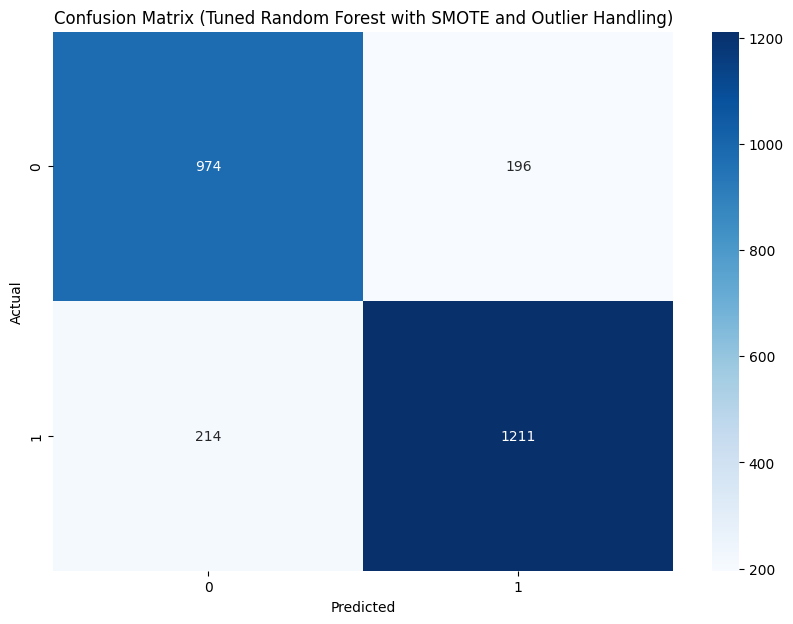

In [152]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Use the best model to make predictions
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Random Forest with SMOTE and Outlier Handling)')
plt.show()

### prediction

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Create a Random Forest model with the best parameters
rf_model = RandomForestClassifier(n_estimators=200,
                                  min_samples_split=2,
                                  min_samples_leaf=4,
                                  max_depth=20,
                                  random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = rf_model.predict(X_test)
print("Model accuracy:", rf_model.score(X_test, y_test))

Model accuracy: 0.8435452793834297
